# Оптимизация маркетинга через ML: сегментация клиентов банка с помощью KMeans и DBSCAN

# Навыки

- **Анализ данных**: Обработка и очистка данных, работа с пропущенными значениями, агрегация данных.  
- **Машинное обучение**: Кластеризация (KMeans, DBSCAN), уменьшение размерности (PCA), масштабирование данных (StandardScaler). 
- **Визуализация**: Построение графиков (Matplotlib, Seaborn), анализ методом локтя, визуализация кластеров.  
- **Программирование**: Python, библиотеки Pandas, Scikit-learn, NumPy.  
- **Интерпретация результатов**: Анализ кластеров, выявление бизнес-инсайтов, подготовка выводов для маркетологов.  

# О датасете

 Источник: Credit Card Transactions Dataset https://www.kaggle.com/datasets/kartik2112/fraud-detection  
 Формат: CSV-файл с колонками:  
 •	index - Unique Identifier for each row  
•	trans_date_trans_time - Transaction DateTime  
•	cc_num - Credit Card Number of Customer  
•	merchant - Merchant Name  
•	category - Category of Merchant  
•	amt - Amount of Transaction  
•	first - First Name of Credit Card Holder  
•	last - Last Name of Credit Card Holder  
•	gender - Gender of Credit Card Holder  
•	street - Street Address of Credit Card Holder  
•	city - City of Credit Card Holder  
•	state - State of Credit Card Holder  
•	zip - Zip of Credit Card Holder  
•	lat - Latitude Location of Credit Card Holder  
•	long - Longitude Location of Credit Card Holder  
•	city_pop - Credit Card Holder's City Population  
•	job - Job of Credit Card Holder  
•	dob - Date of Birth of Credit Card Holder  
•	trans_num - Transaction Number  
•	unix_time - UNIX Time of transaction  
•	merch_lat - Latitude Location of Merchant  
•	merch_long - Longitude Location of Merchant  

# О проекте

**Проект**: Оптимизация маркетинга через ML: сегментация клиентов банка с помощью KMeans и DBSCAN

**Данные**:
Датасет содержит данные о банковских транзакциях.  

**Цель проекта**: выявить группы клиентов с уникальными характеристиками для улучшения маркетинговых стратегий, повышения лояльности и выявления потенциальных мошеннических операций.  

# Содержание

1. **Загрузка данных**:  
   - Импорт данных из CSV-файла.  
   - Проверка структуры данных и вывод первых строк.  


2. **Предобработка данных**:  
   - Проверка на пропущенные значения и дубликаты.  
   - Преобразование типов данных (даты, категории).  
   - Создание новых признаков: возраст, час транзакции, день недели, месяц, флаг ночных транзакций.  
   - Удаление персональных и избыточных данных.  


3. **Агрегация данных по клиентам**:  
   - Группировка данных по номеру кредитной карты (`cc_num`).  
   - Расчет метрик: сумма транзакций, средний чек, количество транзакций, доля ночных покупок, количество уникальных магазинов и категорий.  


4. **Масштабирование данных**:  
   - Применение StandardScaler для нормализации числовых признаков.  


5. **Кластеризация с использованием KMeans**:  
   - Подбор оптимального числа кластеров с помощью метода локтя.  
   - Применение KMeans для создания кластеров.  
   - Добавление меток кластеров в исходные данные.  


6. **Анализ кластеров**:  
   - Расчет средних значений признаков для каждого кластера.  
   - Интерпретация кластеров: описание характеристик групп клиентов.  


7. **Проверка выбросов**:  
   - Использование межквартильного размаха (IQR) для выявления аномалий.  
   - Удаление выбросов и повторный анализ кластеров.  


8. **Применение PCA для визуализации**:  
   - Снижение размерности данных до 2 компонент.  
   - Визуализация кластеров в 2D-пространстве для качественной оценки результатов кластеризации.


9. **Гибридная кластеризация (KMeans + DBSCAN)**:  
   - Применение DBSCAN для анализа плотности данных и выявления аномалий.  
   - Сравнение результатов KMeans и DBSCAN.  


10. **Бизнес-интерпретации и рекомендации для каждого кластера**:  
    - Описание характеристик каждого кластера (диапазоны значений признаков).  
    - Подготовка рекомендаций для маркетологов.  
    - Анализ корреляции признаков с метками кластеров.  

# 1. Загрузка данных

In [3]:
import pandas as pd
data = pd.read_csv('credit_card_dataset/Train.csv')
data = pd.DataFrame(data) # загрузка данных в DataFrame
display(data.head()) # вывод таблицы

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#  2. Предобработка данных

In [4]:
print(data.isna().sum()) #Вывод: В таблице нет пропущенных значений

#Если бы в колонках были пропущенные значения, то при необходимости:
## Их можно заполнить нулем
data['amt'] = data['amt'].fillna(0) 

## Заполнить медианным значением для числовых данных с выбросами или асимметричным распределением без сложных зависимостей
mediana = data['amt'].median()
print(mediana)
data['amt'] = data['amt'].fillna(mediana)

## Или удалить
data = data.dropna(subset=['amt', 'trans_num']) #метод .dropna() для удаления пропусков, параметр subset для указания столбцов, где искать пропуски

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
47.52


In [5]:
# Проверка на наличие дублекатов
print(data.duplicated().sum())

# Дублекатов нет

0


In [6]:
# Проверка типов данных и преобразование
print(data.info()) #вывод информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Далее потребуется преобразовать:
- Transaction datetime типа object в datetime;
- Date of birth типа object в datetime.  


Остальные данные подходящего типа.

In [7]:
from datetime import datetime

In [8]:
# Преобразуем дату рождения в возраст
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')  # Перевод Date of birth в datetime
data['dob'] = data['dob'].dt.date  # Округляем Date of birth до даты

# Считаем возраст
data['age'] = (datetime.now().date() - data['dob']).dt.days // 365  # Используем .dt.days для серии

In [9]:
# Преобразуем дату транзакции в удобный формат
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce') #перевод Transaction datetime типа object в datetime
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour # Извлекаем час транзакции
data['transaction_day'] = data['trans_date_trans_time'].dt.dayofweek + 1 # День недели (1 - понедельник, 7 - воскресенье)
data['transaction_month'] = data['trans_date_trans_time'].dt.month  # Извлекаем месяц транзакции
data['is_night'] = data['transaction_hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)  # Флаг ночной транзакции

Флаг ночной транзакции будем использовать для формирования признака - **доли ночных покупок (night_transactions_ratio)**:
Этот признак отражает долю транзакций, совершенных ночью (с 00:00 до 06:00). Он может помочь выделить клиентов с необычным временем покупок, таких как ночные работники, или выявить аномалии, например, мошенничество.

In [10]:
# Удаляем персональные данные, ненужные колонки, сходную колонку с датой рождения и датой транзакции
data_clear = data.drop(columns=['Unnamed: 0', 'first', 'last', 'street', 'lat', 'long', 'zip', 'merch_lat', 'merch_long', 'trans_date_trans_time', 'trans_num', 'dob', 'unix_time', 'is_fraud'])

In [11]:
data_clear.head()

,cc_num,merchant,category,amt,gender,city,state,city_pop,job,age,transaction_hour,transaction_day,transaction_month,is_night
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",37,0,2,1,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,46,0,2,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,63,0,2,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,58,0,2,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,39,0,2,1,1


In [12]:
data_clear.tail()

,cc_num,merchant,category,amt,gender,city,state,city_pop,job,age,transaction_hour,transaction_day,transaction_month,is_night
1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,258,Geoscientist,63,12,7,6,0
1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,100,"Production assistant, television",45,12,7,6,0
1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,899,Naval architect,57,12,7,6,0
1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,1126,Volunteer coordinator,44,12,7,6,0
1296674,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,M,Sula,MT,218,"Therapist, horticultural",29,12,7,6,0


In [13]:
is_age_100 = (data['age'] == 100).any()
print(is_age_100)

True


# 3. Агрегация данных по клиентам

In [14]:
# Группируем по клиенту (cc_num) и вычисляем статистики
customer_df = data_clear.groupby('cc_num').agg({
    'amt': ['sum', 'mean', 'std', 'count'],  # Сумма, среднее, стандартное отклонение и количество транзакций
    'merchant': 'nunique',  # Количество уникальных магазинов
    'category': 'nunique',  # Количество уникальных категорий
    'transaction_hour': lambda x: (x < 6).sum() / len(x),  # Доля ночных покупок
    'state': 'nunique',  # Количество уникальных штатов
    'city_pop': 'mean',  # Указывает "Средний", чтобы вывести единственное значение
    'age': 'mean',
    'gender': lambda x: 1 if (x == 'M').sum() > (x == 'F').sum() else 0  # Кодируем пол (1 - мужчина, 0 - женщина)
}).reset_index()  # Сбрасываем индексы

In [15]:
customer_df.head()

cc_num        amt                                merchant category  \
                      sum        mean          std count  nunique  nunique   
0  60416207185   85043.47   56.023366   122.632635  1518      575       14   
1  60422928733  105640.20   69.000784   102.681962  1531      578       14   
2  60423098130   58673.63  115.046333  1202.988005   510      338       14   
3  60427851591   59129.61  111.987898   143.310653   528      358       14   
4  60487002085   25160.11   50.726028    65.843969   496      346       14   

  transaction_hour   state  city_pop   age   gender  
          <lambda> nunique      mean  mean <lambda>  
0         0.148880       1    1645.0  39.0        0  
1         0.306336       1   46944.0  83.0        1  
2         0.217647       1      83.0  66.0        1  
3         0.215909       1    2142.0  48.0        1  
4         0.155242       1  233060.0  52.0        1

In [16]:
# Переименовываем столбцы
customer_df.columns = [
    'cc_num', 'total_spent', 'avg_transaction_amt', 'std_transaction_amt', 'transaction_count',
    'unique_merchants', 'unique_categories', 'night_transactions_ratio', 'unique_states',
    'avg_city_pop', 'age', 'is_male'
]

In [17]:
customer_df.head()

,cc_num,total_spent,avg_transaction_amt,std_transaction_amt,transaction_count,unique_merchants,unique_categories,night_transactions_ratio,unique_states,avg_city_pop,age,is_male
0,60416207185,85043.47,56.023366,122.632635,1518,575,14,0.148880,1,1645.0,39.0,0
1,60422928733,105640.20,69.000784,102.681962,1531,578,14,0.306336,1,46944.0,83.0,1
2,60423098130,58673.63,115.046333,1202.988005,510,338,14,0.217647,1,83.0,66.0,1
3,60427851591,59129.61,111.987898,143.310653,528,358,14,0.215909,1,2142.0,48.0,1
4,60487002085,25160.11,50.726028,65.843969,496,346,14,0.155242,1,233060.0,52.0,1


# 4. Масштабирование данных
**Масштабирование данных** необходимо, т.к. многие алгоритмы машинного обучения чувствительны к различным масштабам признаков. Без масштабирования признаки с большими значениями могут доминировать и влиять на результат. 

Масштабирование помогает:
- ускорить обучение, 
- улучшить сходимость алгоритмов,
- сделать признаки сопоставимыми, особенно когда они измеряются в разных единицах.

In [18]:
from sklearn.preprocessing import StandardScaler  # Импортируем StandardScaler для масштабирования данных

In [19]:
customer_df_norm = customer_df.copy() # Создаем отдельную таблицу для нормализированных данных

# Выбираем числовые признаки для масштабирования
numerical_features = ['total_spent', 'avg_transaction_amt', 'std_transaction_amt', 'transaction_count',
                      'unique_merchants', 'unique_categories', 'night_transactions_ratio', 'unique_states',
                      'avg_city_pop', 'age']

# Создаем объект StandardScaler, который будет использоваться для масштабирования
scaler = StandardScaler()

# Масштабируем данные: приводим их к среднему 0 и стандартному отклонению 1
# fit_transform: сначала обучаем scaler на данных (считаем среднее и стандартное отклонение), затем применяем преобразование
customer_df_norm[numerical_features] = scaler.fit_transform(customer_df_norm[numerical_features])

# Просматриваем первые строки после масштабирования
customer_df_norm.head()

,cc_num,total_spent,avg_transaction_amt,std_transaction_amt,transaction_count,unique_merchants,unique_categories,night_transactions_ratio,unique_states,avg_city_pop,age,is_male
0,60416207185,-0.130243,-0.375176,-0.349776,0.245005,0.502011,0.285092,-0.836965,0.0,-0.303445,-0.827228,0
1,60422928733,0.215604,-0.286606,-0.541061,0.261018,0.519194,0.285092,1.085997,0.0,-0.162999,1.555832,1
2,60423098130,-0.573028,0.027652,10.008578,-0.996646,-0.855503,0.285092,0.002867,0.0,-0.308288,0.635104,1
3,60427851591,-0.565372,0.006779,-0.151517,-0.974474,-0.740945,0.285092,-0.018359,0.0,-0.301904,-0.339784,1
4,60487002085,-1.135766,-0.411330,-0.894261,-1.013891,-0.809680,0.285092,-0.759270,0.0,0.414039,-0.123142,1


# 5. Кластеризация с использованием KMeans
**KMeans** — простой и быстрый алгоритм, который хорошо работает с большими данными и создает четкие кластеры. Он легко интерпретируем, эффективен для числовых данных и широко поддерживается. C помощью метода локтя можно легко выбрать количество кластеров.

Однако KMeans не подходит для сложных форм кластеров и чувствителен к выбросам.

In [20]:
import matplotlib.pyplot as plt  # Импортируем библиотеку для построения графиков
from sklearn.cluster import KMeans  # Импортируем KMeans для кластеризации

In [21]:
# Пробуем разные значения k для кластеров и сохраняем инерцию (сумму квадратов расстояний)
inertia = []  # Список для хранения инерции
for k in range(1, 11):  # Пробуем k от 1 до 10
    kmeans = KMeans(n_clusters=k, random_state=50)  # Инициализируем KMeans
    kmeans.fit(customer_df_norm[numerical_features])  # Применяем кластеризацию
    inertia.append(kmeans.inertia_)  # Сохраняем инерцию для данного k

C:\Users\hitwo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


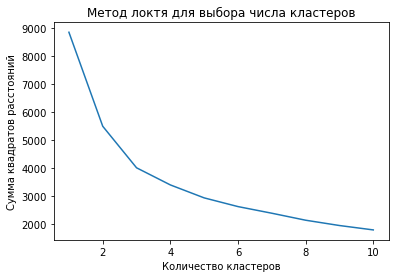

In [22]:
# Строим график для визуализации метода локтя
plt.plot(range(1, 11), inertia)  # Строим график инерции
plt.title('Метод локтя для выбора числа кластеров')  # Заголовок графика
plt.xlabel('Количество кластеров')  # Подпись оси x
plt.ylabel('Сумма квадратов расстояний')  # Подпись оси y
plt.show()  # Показываем график

После **k=3** инерция значительно снижается, значит, это оптимальное количество кластеров.

In [23]:
# Применяем KMeans с выбранным количеством кластеров
kmeans = KMeans(n_clusters=3, random_state=50)  # Инициализируем KMeans с 3 кластерами
customer_df_norm['cluster'] = kmeans.fit_predict(customer_df[numerical_features])  # Применяем кластеризацию и добавляем метки кластеров

# Просматриваем первые строки с добавленными метками кластеров
customer_df_norm.head()

,cc_num,total_spent,avg_transaction_amt,std_transaction_amt,transaction_count,unique_merchants,unique_categories,night_transactions_ratio,unique_states,avg_city_pop,age,is_male,cluster
0,60416207185,-0.130243,-0.375176,-0.349776,0.245005,0.502011,0.285092,-0.836965,0.0,-0.303445,-0.827228,0,0
1,60422928733,0.215604,-0.286606,-0.541061,0.261018,0.519194,0.285092,1.085997,0.0,-0.162999,1.555832,1,0
2,60423098130,-0.573028,0.027652,10.008578,-0.996646,-0.855503,0.285092,0.002867,0.0,-0.308288,0.635104,1,0
3,60427851591,-0.565372,0.006779,-0.151517,-0.974474,-0.740945,0.285092,-0.018359,0.0,-0.301904,-0.339784,1,0
4,60487002085,-1.135766,-0.411330,-0.894261,-1.013891,-0.809680,0.285092,-0.759270,0.0,0.414039,-0.123142,1,0


# 6. Анализ кластеров

In [24]:
# Выводим средние значения признаков по каждому кластеру
cluster_summary = customer_df_norm.groupby('cluster').mean()  # Группируем по кластерам и считаем среднее
print(cluster_summary.head())  # Печатаем результаты

               cc_num  total_spent  avg_transaction_amt  std_transaction_amt  \
cluster                                                                        
0        4.195543e+17     0.009814            -0.010696            -0.005282   
1        3.230802e+15    -0.104625             0.889575             0.696048   
2        4.538887e+17    -0.169404             0.091547             0.014395   

         transaction_count  unique_merchants  unique_categories  \
cluster                                                           
0                 0.013586          0.015077           0.013727   
1                -0.244840         -0.634024          -0.823693   
2                -0.222511         -0.203438          -0.155650   

         night_transactions_ratio  unique_states  avg_city_pop       age  \
cluster                                                                    
0                       -0.014909            0.0     -0.209562  0.005277   
1                        0.463617  

**Интерпретация результатов кластеризации**  
Чтобы продакты и маркетологи могли интерпретировать данные, вместо нормализованных значений (где сложно понять реальный возраст или сумму трат) нужно показать реальные числовые диапазоны до нормализации.

Действия:
- Добавить метки кластеров в датасет **до масшабирования**.
- Найти минимальные и максимальные значения признаков **до масштабирования** для каждого кластера.
- Вывести их в виде таблицы, чтобы маркетологи могли сразу увидеть реальные цифры.
- Добавить описание, что означает каждый показатель.

In [25]:
# Добавляем кластеры в исходные данные до масштабирования
customer_df['cluster'] = kmeans.labels_  # customer_clusters — это результат KMeans

# Группируем по кластерам и считаем min-max для каждого признака
cluster_ranges = customer_df.groupby('cluster').agg(['min', 'max'])

# Оставляем только нужные признаки
features = ['total_spent', 'avg_transaction_amt', 'transaction_count', 'age']
cluster_ranges = cluster_ranges[features]

# Переименовываем столбцы для удобства
cluster_ranges.columns = [f"{col[0]} ({col[1]})" for col in cluster_ranges.columns]

# Выводим таблицу
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)  # Округляем до 2 знаков
print(cluster_ranges)

         total_spent (min)  total_spent (max)  avg_transaction_amt (min)  \
cluster                                                                    
0                  1348.53          296436.73                      42.95   
1                  3595.25          213039.80                      50.01   
2                  1496.10          278042.99                      46.94   

         avg_transaction_amt (max)  transaction_count (min)  \
cluster                                                       
0                           918.43                        7   
1                           625.60                        7   
2                           948.82                        7   

         transaction_count (max)  age (min)  age (max)  
cluster                                                 
0                           3123      20.00     100.00  
1                           2558      25.00      65.00  
2                           3032      21.00      82.00  


### Общие выводы: 

#### **Кластер 0**:
- **Самый разнообразный по всем параметрам**: широкий диапазон общей суммы трат, средней суммы транзакции, количества транзакций и возраста.
- **Возможная интерпретация**: это "универсальный" кластер, включающий клиентов с разным поведением. Здесь могут быть как активные клиенты с большим количеством транзакций, так и клиенты с крупными, но редкими покупками.

#### **Кластер 1**:
- **Высокий минимальный порог**: по общей сумме трат и средней сумме транзакции.
- **Узкий диапазон возрастов**: от 25 до 65 лет.
- **Возможная интерпретация**: это кластер "премиальных" клиентов, которые тратят больше и совершают более крупные покупки. Они могут быть целевой аудиторией для премиальных услуг или продуктов.

#### **Кластер 2**:
- **Похож на кластер 0**, но с немного меньшим диапазоном по общей сумме трат и более высоким максимумом средней суммы транзакции.
- **Возможная интерпретация**: это кластер клиентов, которые совершают меньше транзакций, но с более крупными суммами. Возможно, это клиенты, которые делают редкие, но дорогие покупки.

**Анализ корреляции признаков с метками кластеров**  
Это покажет, насколько сильно каждый признак коррелирует с метками кластеров. Признаки, имеющие сильную корреляцию с метками, скорее всего, сыграли ключевую роль в разделении.


**Корреляционная матрица** показывает, насколько сильно признаки связаны друг с другом. Значения корреляции варьируются от -1 до 1:  
1: Положительная корреляция.  
-1: Отрицательная корреляция.  
0: Нет корреляции.  

In [27]:
# Добавляем метки кластеров в таблицу
customer_df['cluster'] = kmeans.labels_

# Анализируем корреляцию признаков с метками кластеров
correlation = customer_df[features + ['cluster']].corr()
print(correlation)

                     total_spent  avg_transaction_amt  transaction_count  \
total_spent                 1.00                -0.38               0.93   
avg_transaction_amt        -0.38                 1.00              -0.45   
transaction_count           0.93                -0.45               1.00   
age                        -0.31                 0.11              -0.29   
cluster                    -0.04                 0.03              -0.05   

                      age  cluster  
total_spent         -0.31    -0.04  
avg_transaction_amt  0.11     0.03  
transaction_count   -0.29    -0.05  
age                  1.00    -0.01  
cluster             -0.01     1.00  


### Выводы:
1. **Признаки слабо связаны с кластерами**: Все признаки (`total_spent`, `avg_transaction_amt`, `transaction_count`, `age`) имеют очень слабую корреляцию с метками кластеров. Это может означать, что кластеры не сильно зависят от этих признаков, либо кластеризация была выполнена на основе других признаков.


2. **Сильная связь между `total_spent` и `transaction_count`**: Клиенты с большим количеством транзакций склонны тратить больше в целом.


3. **Отрицательная связь между `total_spent` и `avg_transaction_amt`**: Клиенты с высокой средней суммой транзакции склонны совершать меньше транзакций.


4. **Возраст почти не влияет на поведение**: Возраст клиента слабо связан с общей суммой трат, количеством транзакций и средней суммой транзакции.

# 7. Проверка выбросов и аномалии
Мы можем использовать метод межквартильного размаха (IQR) или визуализацию (ящичные диаграммы, гистограммы, кластерные графики).

Проверим выбросы с помощью IQR.

In [30]:
# Выбираем числовые признаки для анализа выбросов
features_to_check = numerical_features  # Используем те же числовые признаки

# Рассчитываем IQR (межквартильный размах)
Q1 = customer_df_norm[features_to_check].quantile(0.25)
Q3 = customer_df_norm[features_to_check].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные без выбросов
filtered_df = customer_df_norm[~((customer_df_norm[features_to_check] < lower_bound) | 
                                 (customer_df_norm[features_to_check] > upper_bound)).any(axis=1)]

print(f'Количество удаленных выбросов: {customer_df_norm.shape[0] - filtered_df.shape[0]}')

Количество удаленных выбросов: 295


In [33]:
# Определяем ключевые признаки каждого кластера

# Мы посмотрим на средние значения (или диапазоны) признаков по каждому кластеру.

#Средние значения признаков для каждого кластера

cluster_summary = filtered_df.groupby('cluster').agg(['mean', 'min', 'max'])

# Выбираем ключевые финансовые и поведенческие признаки
features = ['total_spent', 'avg_transaction_amt', 'transaction_count', 'age']

# Оставляем только важные признаки
cluster_summary = cluster_summary[features]

# Переименовываем колонки для удобства
cluster_summary.columns = [f"{col[0]} ({col[1]})" for col in cluster_summary.columns]

# Выводим таблицу
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)  # Округляем до 2 знаков
print(cluster_summary)

         total_spent (mean)  total_spent (min)  total_spent (max)  \
cluster                                                             
0                      0.05              -1.18               2.47   

         avg_transaction_amt (mean)  avg_transaction_amt (min)  \
cluster                                                          
0                             -0.28                      -0.46   

         avg_transaction_amt (max)  transaction_count (mean)  \
cluster                                                        
0                             0.01                      0.10   

         transaction_count (min)  transaction_count (max)  age (mean)  \
cluster                                                                 
0                          -1.04                     2.22       -0.00   

         age (min)  age (max)  
cluster                        
0            -1.86       2.48  


**После удаления выбросов остался только кластер 0, кластеры 1 и 2 удалились полностью**.

In [34]:
print(customer_df['cluster'].value_counts())  # До удаления выбросов
print(filtered_df['cluster'].value_counts())  # После удаления

0    927
2     50
1      6
Name: cluster, dtype: int64
0    688
Name: cluster, dtype: int64


In [35]:
print(len(customer_df) - len(filtered_df)) # Проверяем, сколько точек удалилось всего в качестве выбросов

295


**После удаления выбросов кластеры 1 и 2 удалились полностью, в них входило 56 точек. Частично очистился и кластер 1. Необходимо вернуть кластеры 1 и 2, т.к. это могут быть VIP-клиенты или мошенники**.  

Дальнейшие шаги:
 1. Работаем с customer_df, а не с filtered_df — т.е. возвращаемся к полной выборке.
 2. Пересчитываем статистики для всех кластеров (0, 1, 2).
 3. Анализируем, чем отличаются кластеры — возможно, один из них действительно VIP-клиенты, мошенники или редкие пользователи.
 4. Готовим интерпретацию для маркетологов.

# 8. Применение PCA для уменьшения размерности

In [28]:
from sklearn.decomposition import PCA

# Применяем PCA с нормализованными данными
pca = PCA(n_components=2)  # Уменьшаем до 2 компонент для визуализации
principal_components = pca.fit_transform(customer_df_norm[numerical_features])

# Преобразуем в DataFrame для удобства
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Выбираем 3 кластера
pca_df['cluster'] = kmeans.fit_predict(pca_df)

# Печатаем результаты
print(pca_df.head())  # Выводим первые строки

    PC1   PC2  cluster
0 -1.02  0.40        0
1 -0.25 -1.60        1
2  3.80  2.80        2
3  0.71 -0.36        1
4  0.50 -0.65        1


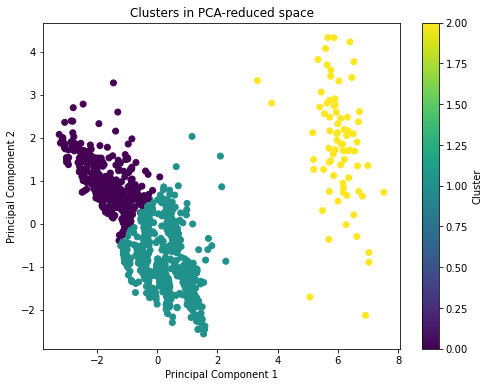

In [29]:
# Визуализация кластеров на 2D графике
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', marker='o')
plt.title('Clusters in PCA-reduced space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

**KMEANS** создал кластер, который **отдален** от остальных двух. Это значит, что кластер не имеет связи с остальными данными. Он может быть “шумом” или маленьким подмножеством данных, которое не подходит для такого метода кластеризации, особенно если данные имеют аномальные точки или выбросы.

# 9. Гибридная кластеризация KMEANS + DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, который делит данные на кластеры, основываясь на плотности точек. Он не требует заранее заданного количества кластеров и может находить кластеры произвольной формы. DBSCAN также выделяет выбросы, которые не принадлежат кластерам. Основные параметры — это радиус поиска соседей (eps) и минимальное количество точек для кластера (min_samples).  
• eps — радиус окрестности вокруг точки. Определяет, насколько «плотными» должны быть данные, чтобы образовать кластер.  
 • min_samples — минимальное количество точек, которые должны быть в пределах радиуса eps, чтобы начать кластер.

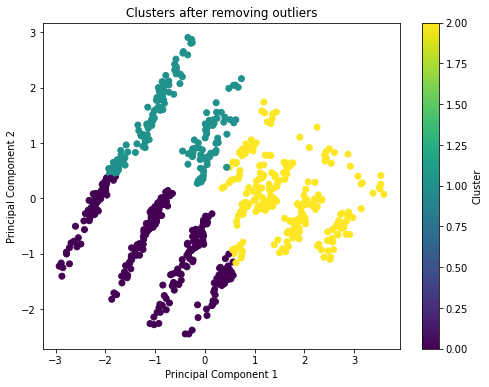

In [31]:
# Метод KMeans (с обновленными данными)

# Повторяем PCA с очищенными данными
pca_filtered = PCA(n_components=2)
principal_components_filtered = pca_filtered.fit_transform(filtered_df[features_to_check])

pca_filtered_df = pd.DataFrame(data=principal_components_filtered, columns=['PC1', 'PC2'])

# Кластеризация
kmeans_filtered = KMeans(n_clusters=3, random_state=42)
pca_filtered_df['cluster'] = kmeans_filtered.fit_predict(pca_filtered_df)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(pca_filtered_df['PC1'], pca_filtered_df['PC2'], c=pca_filtered_df['cluster'], cmap='viridis', marker='o')
plt.title('Clusters after removing outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

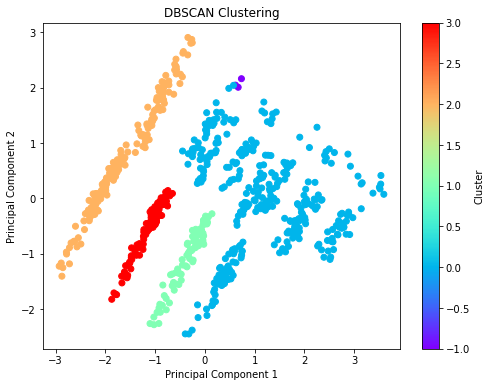

In [32]:
from sklearn.cluster import DBSCAN

# Применяем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Подбираем параметры
pca_filtered_df['cluster'] = dbscan.fit_predict(pca_filtered_df[['PC1', 'PC2']])

# Визуализация DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(pca_filtered_df['PC1'], pca_filtered_df['PC2'], c=pca_filtered_df['cluster'], cmap='rainbow', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

**Возвращение к полной выборке и расчет статистик**

In [36]:
# Gересчитаем диапазоны значений признаков (min/max) и средние значения для каждого кластера:

# Группируем по кластерам и считаем min, max, mean для каждого признака
cluster_summary = customer_df.groupby('cluster').agg(['min', 'max', 'mean'])

# Оставляем только важные признаки
features = ['total_spent', 'avg_transaction_amt', 'transaction_count', 'age']
cluster_summary = cluster_summary[features]

# Переименовываем столбцы для удобства
cluster_summary.columns = [f"{col[0]} ({col[1]})" for col in cluster_summary.columns]

# Выводим результат
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)  # Округляем до 2 знаков
print(cluster_summary)

         total_spent (min)  total_spent (max)  total_spent (mean)  \
cluster                                                             
0                  1348.53          296436.73            93384.52   
1                  3595.25          213039.80            86569.16   
2                  1496.10          278042.99            82711.28   

         avg_transaction_amt (min)  avg_transaction_amt (max)  \
cluster                                                         
0                            42.95                     918.43   
1                            50.01                     625.60   
2                            46.94                     948.82   

         avg_transaction_amt (mean)  transaction_count (min)  \
cluster                                                        
0                            109.43                        7   
1                            241.34                        7   
2                            124.41                        7   

       

### Итоговые выводы для маркетологов:
**Кластер 0** — **лояльные клиенты с высокими доходами**, ключевая группа для удержания. Это наиболее активные клиенты — тратят больше всех, совершают много покупок и приносят наибольший доход компании. Стоит инвестировать в программы лояльности и персонализацию.  

Количество в кластере: 927.  
Средний чек: 109.43.  
Возраст: от 20 до 100 лет.  

**Кластер 1** — **молодые клиенты с высоким средним чеком**. Они совершают редкие, но крупные покупки. Стоит стимулировать их к более частым покупкам через премиальные предложения и бонусы.. Можно передать этот сегмент с Службу Безопасности для проверки мошеничества.

Количество в кластере: 6
Средний чек: 241.34 (самый высокий среди кластеров).
Возраст: от 25 до 65 лет.

**Кластер 2** — **группа с умеренными расходами**. Для них важно увеличить средний чек и частоту покупок через акции и программы подписки.  

Количество в кластере: 50.  
Средний чек: 124.41.  
Возраст: от 21 до 82 лет.  

# Бизнес-интерпретации и рекомендации для каждого кластера

---

#### **Кластер 0: Лояльные клиенты с высокими доходами**
- **Маркетинговые стратегии:**  
  - **Программы лояльности:** Внедрить программы с накопительными бонусами, эксклюзивными скидками и персональными предложениями.  
  - **Персонализация:** Использовать данные о покупках для создания индивидуальных рекомендаций и предложений.  
  - **Премиальные услуги:** Предложить VIP-обслуживание, ранний доступ к новым продуктам/механикам и эксклюзивные мероприятия.  


- **Продукты или услуги:**  
  - **Премиальные товары:** Эксклюзивные продукты, которые подчеркивают статус клиента.  
  - **Услуги с добавленной стоимостью:** Гарантии, расширенные сервисы, персональные консультации.  
  - **Новинки и инновации:** Ранний доступ к новым продуктам или услугам.  


- **Удержание клиентов:**  
  - **Постоянная коммуникация:** Регулярно информировать клиентов о новых предложениях и акциях через email, SMS или push-уведомления.  
  - **Обратная связь:** Собирать отзывы и учитывать пожелания клиентов для улучшения сервиса.  
  - **Эмоциональная связь:** Создавать истории бренда, которые резонируют с ценностями клиентов.  

---

#### **Кластер 1: Молодые клиенты с высоким средним чеком**
- **Маркетинговые стратегии:**  
  - **Стимулирование частоты покупок:** Предложить бонусы или скидки за повторные покупки.  
  - **Акции и спецпредложения:** Проводить ограниченные по времени акции, чтобы стимулировать срочные покупки.  
  - **Социальные доказательства:** Использовать отзывы, рейтинги и рекомендации для повышения доверия.  


- **Продукты или услуги:**  
  - **Инновационные продукты:** Товары, которые подчеркивают технологичность и современность банка.  
  - **Услуги с высокой добавленной стоимостью:** Гарантии, подписки, эксклюзивные услуги.  
  - **Трендовые товары:** Продукты, которые соответствуют текущим трендам и интересам молодежи.  


- **Удержание клиентов:**  
  - **Геймификация:** Внедрить программы с бонусами, уровнями и наградами за активность.  
  - **Социальные медиа:** Активно взаимодействовать с клиентами через социальные сети, в коммуникациях подчеркивать технологичность банка.  
  - **Персонализация:** Использовать данные для создания индивидуальных предложений, которые соответствуют их интересам.  

---

#### **Кластер 2: Клиенты с умеренными расходами**
- **Маркетинговые стратегии:**  
  - **Акции и скидки:** Предложить выгодные условия оформления дебетовых карт, вкладов, подписок экосистемы для увеличения среднего чека и частоты покупок.  
  - **Программы и подписки:** Внедрить подписки для выгоднях покупок.  
  - **Кэшбэк и бонусы:** Вознаграждать клиентов за каждую покупку бонусами и коммуникациями, чтобы стимулировать повторные транзакции.  


- **Продукты или услуги:**  
  - **Бюджетные и средние товары:** Предложить оформление кредитной карты и потребительского кредита.  
  - **Безопасность и гарантия:** В коммуникациях подчеркивать безопасность и минимизацию рисков для клиента.  
  - **Кешбэк на товары повседневного спроса:** Стимулировать увеличение частоты покупок.  


- **Удержание клиентов:**  
  - **Регулярные напоминания:** Информировать клиентов о новых акциях и предложениях через email или SMS.  
  - **Программы лояльности:** Внедрить простые и понятные программы с бонусами за каждую покупку.  
  - **Улучшение сервиса:** Обеспечить высокий уровень обслуживания, чтобы клиенты чувствовали заботу и ценность.  

---

### Итоговые рекомендации:
1. **Кластер 0** — фокус на удержание через персонализацию, премиальные услуги и программы лояльности.  
2. **Кластер 1** — стимулирование частоты покупок через акции, бонусы и трендовые предложения.  
3. **Кластер 2** — увеличение среднего чека и частоты покупок через акции, подписки и программы кэшбэка.  

Эти стратегии помогут максимизировать доход и удержание клиентов в каждом кластере, а также улучшить их удовлетворенность и лояльность.

---
Спасибо за внимание!

Ангелина Боровкова  
tg @angborovkova